In [5]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 3.1.6

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/11/20
"""
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import seaborn as sns

#Constants (all MKS, except energy which is in eV)
au2ang = 0.529177210903
ang2au = 1/au2ang
au2eV = 27.211386245988
eV2au = 1/au2eV

In [42]:
#Lattice
Rmax = 10 * ang2au
NR = 200
dR = Rmax/NR
print('Rmax = %g Ang; NR = %d; dR = %g Ang' % (Rmax*au2ang,NR,dR*au2ang))
#R = dr*np.linspace(1,Nr)
R = dR*np.arange(1,NR+1)
#R = np.arange(dR,Rmax+dr,dR)
#print(R)

Rmax = 10 Ang; NR = 200; dR = 0.05 Ang


In [59]:
#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
t0 = 1/(2 * dR**2)
T = 2*t0*np.eye(NR) - t0*np.eye(NR,k=1) - t0*np.eye(NR,k=-1)
UN = -14/R # Z=14 for silicon
l = 1
Ul1 = l*(l+1)/2/R**2

# SCF iterations
Uscf = np.zeros(NR)
maxit = 100
tol = 1e-3
iter = 1
Eold = 0
converged = False

while iter < maxit and not converged:
    # "eigh" => eigenvalues W in ascending order & normalized eigenvector
    D,V = LA.eigh(T + np.diag(UN + Uscf)) 
    E1s = D[0] ; psi = V[:,0] ; P1s = psi * np.conj(psi)
    E2s = D[1] ; psi = V[:,1] ; P2s = psi * np.conj(psi)
    E3s = D[2] ; psi = V[:,2] ; P3s = psi * np.conj(psi)

    D,V = LA.eigh(T + np.diag(UN + Ul1 + Uscf)) 
    E2p = D[0] ; psi = V[:,0] ; P2p = psi * np.conj(psi)
    E3p = D[1] ; psi = V[:,1] ; P3p = psi * np.conj(psi)

#    Etot  = (2*(E1s+E2s+E3s))+(6*E2p)+(2*E3p)
    Ptot  = (2*(P1s+P2s+P3s))+(6*P2p)+(2*P3p)
    # "effective" self-interaction correction (SIC) 
    Ptot = Ptot * (13/14) 
    Uh = np.cumsum(Ptot)/R + (sum(Ptot/R)-np.cumsum(Ptot/R))
    Unew = Uh
    P = Ptot
    # local density approximation (LDA)
##    Ux = - (3/(4*np.pi))**(1/3) * np.where(abs(P)>np.finfo(float).eps,P**(-1/3),0)
#    Ux = - (P/(4*np.pi*R*R*dR))**(1/3)
#    Unew += Ux
#    print(np.where(abs(P)>np.finfo(float).eps,P**(-1/3),0)) 
#    change = sum(abs(Unew-Uscf))/NR

    change = abs(Unew - Uscf).sum()/NR
    if(change < tol): converged = True
#    print('iter = %d: E = %.3f eV, change = %.3e ... %s' % (iter, Enew*au2eV, change*au2eV, converged))
    print('iter = %d: change = %.3e ... %s' % (iter, change*au2eV, converged))

    Uscf = 0.9*Unew + 0.1*Uscf
#    Eold = Enew
    iter += 1

print('E1s = %.3f, E2s = %.3f, E2p = %.3f, E3s = %.3f, E3p = %.3f [eV]' % \
          (E1s*au2eV, E2s*au2eV, E2p*au2eV, E3s*au2eV, E3p*au2eV, ) )

#plt.plot(R*au2ang, Ux*au2eV, linewidth=2, linestyle='-', marker='o')

iter = 1: change = 8.955e+01 ... False
iter = 2: change = 1.290e+01 ... False
iter = 3: change = 8.131e+00 ... False
iter = 4: change = 5.264e+00 ... False
iter = 5: change = 3.920e+00 ... False
iter = 6: change = 2.472e+00 ... False
iter = 7: change = 1.910e+00 ... False
iter = 8: change = 1.316e+00 ... False
iter = 9: change = 1.015e+00 ... False
iter = 10: change = 7.253e-01 ... False
iter = 11: change = 5.538e-01 ... False
iter = 12: change = 4.036e-01 ... False
iter = 13: change = 3.053e-01 ... False
iter = 14: change = 2.248e-01 ... False
iter = 15: change = 1.690e-01 ... False
iter = 16: change = 1.251e-01 ... False
iter = 17: change = 9.374e-02 ... False
iter = 18: change = 6.961e-02 ... False
iter = 19: change = 5.203e-02 ... False
iter = 20: change = 3.870e-02 ... False
iter = 21: change = 2.889e-02 ... False
iter = 22: change = 2.151e-02 ... True
E1s = -1137.542, E2s = -102.786, E2p = -101.445, E3s = -10.758, E3p = -7.496 [eV]


0.9999947014879834


(0.0, 0.1)

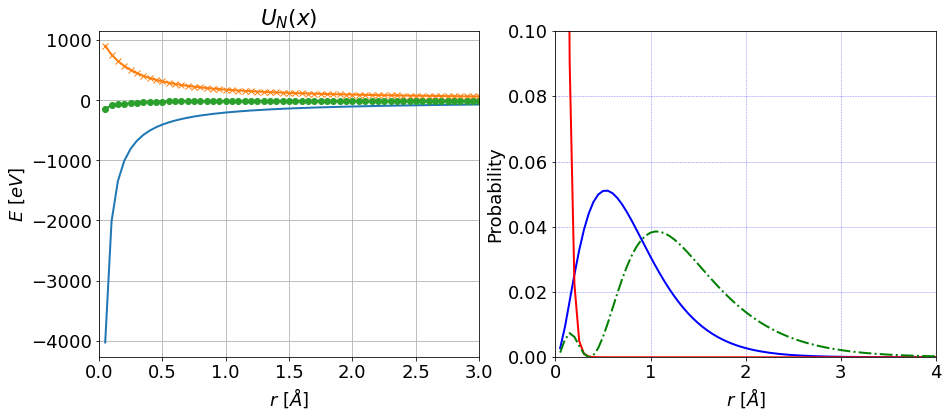

In [55]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams.update({'font.size': 18})

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#analytical solutions for 1s hydrogen
P0 = 4*np.exp(-2*R) * R**2 * dR
print(sum(P0))

ax1.plot(R*au2ang, UN*au2eV, '-', lw=2)
ax1.plot(R*au2ang, Uh*au2eV, '-x', lw=2)
ax1.plot(R*au2ang, Ux*au2eV, '-o', lw=2)
#ax1.plot(R*au2ang,P0,'b',lw=2)
#ax1.plot(R*au2ang,P1s,'r',lw=2)
#ax1.plot(R*au2ang,P2s,'r--',lw=2)
#ax1.plot(R*au2ang,P3s,'r-.',lw=2)
ax1.set(xlabel='$r \ [\AA]$')
ax1.set(ylabel='$E \ [eV]$')
ax1.set(title='$U_N(x)$')
ax1.grid(True)
#ax1.set_xlim(0,Rmax*au2ang)
ax1.set_xlim(0,3)
#ax1.set_ylim(-100,50)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)

ax2.plot(R*au2ang,P0,'b',lw=2)
ax2.plot(R*au2ang,P1s,'r',lw=2)
#ax2.plot(R*au2ang,P2s,'r--',lw=2)
#ax2.plot(R*au2ang,P2p,'g',lw=2)
#ax2.plot(R*au2ang,P3s,'g--',lw=2)
ax2.plot(R*au2ang,P3p,'g-.',lw=2)
ax2.set(xlabel='$r \ [\AA]$')
ax2.set(ylabel='Probability')
ax2.grid(color='b', alpha=0.5, ls='--',lw=0.5)
#ax2.set_xlim(0,Rmax*au2ang)
ax2.set_xlim(0,4)
ax2.set_ylim(0,0.1)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
#text(0.1e-9,0.07,'Helium',fontsize=15)
#text(0.15e-9,0.03,'Hydrogen',fontsize=15)

#plt.show()